# Import the necessary libraries

In [16]:
import warnings
warnings.filterwarnings("default", category=DeprecationWarning)

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

from keras.models import Model
from keras.layers import LSTM, Activation, Dense, Dropout, 
Input, Embedding
from keras.optimizers import RMSprop
from keras.preprocessing.text import Tokenizer
from keras.preprocessing import sequence
from keras.utils import to_categorical
from keras.callbacks import EarlyStopping

# Load the data into Pandas dataframe

In [3]:
df = pd.read_csv('data/spam.csv',delimiter=',',encoding='latin-1')
df.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [17]:
df.drop(['Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4'],axis=1,inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   v1      5572 non-null   object
 1   v2      5572 non-null   object
dtypes: object(2)
memory usage: 87.2+ KB


# Understanding data distribution better

Text(0.5, 1.0, 'Number of ham and spam messages')

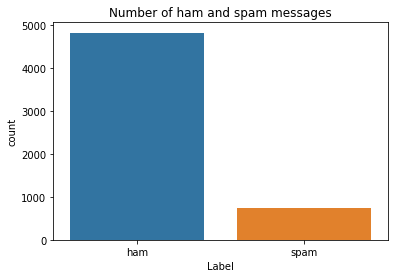

In [4]:
sns.countplot(df.v1)
plt.xlabel('Label')
plt.title('Number of ham and spam messages')

## Create input and output vectors.
### Process the labels.

In [5]:
X = df.v2
Y = df.v1
le = LabelEncoder() # sklearn preprocessing object LabelEncoder to encode label
Y = le.fit_transform(Y) # fit and transform Y into encode label
Y = Y.reshape(-1,1)  # reshape value encode into -1(spam), 1(ham)

# Split into training and test data.

In [6]:
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.15)

In [22]:
X_train

5440        Thank you. do you generally date the brothas?
4013    Sorry, I can't text &amp; drive coherently, se...
1169    Msgs r not time pass.They silently say that I ...
4170    Pls what's the full name of joke's school cos ...
1670                                          Lmao!nice 1
                              ...                        
5209    I know you are thinkin malaria. But relax, chi...
3130    LookAtMe!: Thanks for your purchase of a video...
3146    Oh thats late! Well have a good night and i wi...
3992    Nimbomsons. Yep phone knows that one. Obviousl...
1086                  I don't think he has spatula hands!
Name: v2, Length: 4736, dtype: object

# Process the data
- Tokenize the data and convert the `text` to `sequences`.
- Add padding `to ensure` `that all the sequences` `have the same shape`.
- There are many ways of taking the `max_len` `and here` `an arbitrary` `length of 150` `is chosen`.

In [7]:
max_words = 1000 # arbitrary set max words for corpus
max_len = 150 # maximum len for max shape array

In [8]:
tok = Tokenizer(num_words=max_words) # keras.preprocessing.text 
# Tokenizer object

tok.fit_on_texts(X_train) # Updates internal vocabulary based on a list 
# of texts

sequences = tok.texts_to_sequences(X_train) # Transforms each text in 
# texts to a sequence of integers

sequences_matrix = sequence.pad_sequences(sequences,maxlen=max_len) 
# keras.preprocessing sequence method to transforms a list of sequences 
# (lists of integers) into a 2D Numpy array of shape `(num_samples, 
# num_timesteps)`. `num_timesteps` is either the `maxlen` argument 
# if provided, or the length of the longest sequence otherwise

In [23]:
tok.index_word # 1000 words

{1: 'i',
 2: 'to',
 3: 'you',
 4: 'a',
 5: 'the',
 6: 'u',
 7: 'and',
 8: 'in',
 9: 'is',
 10: 'me',
 11: 'my',
 12: 'for',
 13: 'your',
 14: 'it',
 15: 'of',
 16: 'call',
 17: 'have',
 18: 'on',
 19: '2',
 20: 'that',
 21: 'now',
 22: 'are',
 23: 'so',
 24: 'not',
 25: 'but',
 26: 'or',
 27: 'can',
 28: 'get',
 29: 'do',
 30: "i'm",
 31: 'at',
 32: 'with',
 33: 'if',
 34: 'ur',
 35: 'will',
 36: 'be',
 37: 'just',
 38: 'no',
 39: 'we',
 40: 'this',
 41: '4',
 42: 'up',
 43: 'gt',
 44: 'lt',
 45: 'free',
 46: 'when',
 47: 'how',
 48: 'from',
 49: 'ok',
 50: 'go',
 51: 'out',
 52: 'what',
 53: 'all',
 54: 'then',
 55: 'know',
 56: 'like',
 57: 'good',
 58: 'got',
 59: 'come',
 60: 'am',
 61: 'was',
 62: 'only',
 63: 'time',
 64: 'its',
 65: 'love',
 66: 'day',
 67: 'there',
 68: 'text',
 69: 'he',
 70: 'send',
 71: 'want',
 72: 'txt',
 73: 'as',
 74: 'going',
 75: "i'll",
 76: 'one',
 77: 'need',
 78: 'home',
 79: 'about',
 80: 'lor',
 81: 'r',
 82: 'sorry',
 83: 'stop',
 84: 'back',
 8

In [19]:
sequences # sequence of integers mapping words to tok corpus

[[450, 3, 29, 3, 552, 5],
 [82, 1, 209, 68, 155, 597, 90, 3, 8],
 [659,
  81,
  24,
  63,
  973,
  121,
  153,
  20,
  1,
  60,
  578,
  15,
  6,
  145,
  21,
  7,
  175,
  553,
  6,
  99,
  15,
  10,
  31,
  701,
  41,
  4,
  702,
  703],
 [107, 554, 5, 598, 250, 15, 467, 169, 8, 15, 2, 394, 36, 44, 43, 91, 107, 84],
 [245, 118],
 [69, 9, 336],
 [231, 57, 660, 450, 309, 109, 5, 17, 749, 15, 974, 7, 17, 4, 579, 66],
 [186, 10, 34, 580, 519, 214],
 [24,
  4,
  310,
  115,
  704,
  116,
  834,
  170,
  9,
  31,
  105,
  7,
  9,
  395,
  749,
  37,
  10,
  7,
  8,
  31,
  5,
  47,
  17,
  3,
  108],
 [29, 3, 55, 46, 408, 35, 36, 84],
 [1, 71, 2, 90, 13, 661],
 [103, 110, 975, 12],
 [259,
  11,
  65,
  47,
  215,
  13,
  66,
  22,
  3,
  484,
  1,
  99,
  15,
  3,
  11,
  373,
  7,
  70,
  4,
  2,
  13,
  282,
  2,
  3,
  1,
  65,
  3,
  27,
  3,
  409,
  14,
  1,
  14,
  976,
  5,
  705,
  12,
  53,
  5,
  336,
  2,
  409,
  9,
  7,
  385],
 [1, 337, 3, 246, 36, 73, 57, 129, 73, 101, 187]

In [20]:
sequences_matrix.shape # matrix 4736 x 150 
# (after padding sequences 150 equally)

(4736, 150)

In [9]:
# RNN
# Define the RNN structure.

def RNN():
    inputs = Input(name='inputs',shape=[max_len])
    layer = Embedding(max_words,50,input_length=max_len)(inputs)
    layer = LSTM(64)(layer)
    layer = Dense(256,name='FC1')(layer)
    layer = Activation('relu')(layer)
    layer = Dropout(0.5)(layer)
    layer = Dense(1,name='out_layer')(layer)
    layer = Activation('sigmoid')(layer)
    model = Model(inputs=inputs,outputs=layer)
    return model

In [10]:
# Call the function and compile the model.

model = RNN()
model.summary()
model.compile(loss='binary_crossentropy',optimizer=RMSprop(),metrics=['accuracy'])

Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
inputs (InputLayer)          (None, 150)               0         
_________________________________________________________________
embedding_1 (Embedding)      (None, 150, 50)           50000     
_________________________________________________________________
lstm_1 (LSTM)                (None, 64)                29440     
_________________________________________________________________
FC1 (Dense)                  (None, 256)               16640     
_________________________________________________________________
activation_1 (Activation)    (None, 256)               0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 256)               0         
_________________________________________________________________
out_layer (Dense)            (None, 1)                 257 

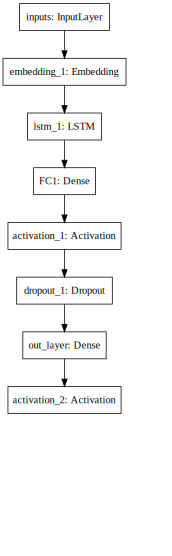

In [37]:
import keras
import pydot as pyd
from IPython.display import SVG
from keras.utils.vis_utils import model_to_dot

keras.utils.vis_utils.pydot = pyd

#Visualize Model

def visualize_model(model):
    return SVG(model_to_dot(model).create(prog='dot', format='svg'))
#create your model
#then call the function on your model
visualize_model(model)

from keras.utils import plot_model
plot_model(model, to_file='model.png')

In [11]:
model.fit(sequences_matrix,Y_train,batch_size=128,epochs=10,
          validation_split=0.2,callbacks=[EarlyStopping(monitor='val_loss',min_delta=0.0001)])


Train on 3788 samples, validate on 948 samples
Epoch 1/10
3788/3788 [==============================] - 23s 6ms/step - loss: 0.3392 - accuracy: 0.8691 - val_loss: 0.1688 - val_accuracy: 0.9705
Epoch 2/10
3788/3788 [==============================] - 22s 6ms/step - loss: 0.0971 - accuracy: 0.9786 - val_loss: 0.0538 - val_accuracy: 0.9863
Epoch 3/10
3788/3788 [==============================] - 21s 6ms/step - loss: 0.0478 - accuracy: 0.9855 - val_loss: 0.0468 - val_accuracy: 0.9884
Epoch 4/10
3788/3788 [==============================] - 23s 6ms/step - loss: 0.0329 - accuracy: 0.9900 - val_loss: 0.0677 - val_accuracy: 0.9852


In [12]:
# Process the test set data.
test_sequences = tok.texts_to_sequences(X_test)
test_sequences_matrix = sequence.pad_sequences(test_sequences,maxlen=max_len)

In [13]:
# Evaluate the model on the test set.

accr = model.evaluate(test_sequences_matrix,Y_test)

836/836 [==============================] - 2s 3ms/step


In [14]:
print('Test set\n  Loss: {:0.3f}\n  Accuracy: {:0.3f}'.format(accr[0],accr[1]))

Test set
  Loss: 0.061
  Accuracy: 0.981
